In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib as mpl


#### using pandas_datareader load apple stock price from 2015 to 2020


In [4]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 1, 11)
# store stock price data into dataframe
df = web.DataReader("AAPL", 'yahoo', start, end)
print(df.tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-01-06  299.959991  292.750000  293.790009  299.799988  29596800.0   
2020-01-07  300.899994  297.480011  299.839996  298.390015  27218000.0   
2020-01-08  304.440002  297.160004  297.160004  303.190002  33019800.0   
2020-01-09  310.429993  306.200012  307.239990  309.630005  42527100.0   
2020-01-10  312.670013  308.250000  310.600006  310.329987  35161200.0   

             Adj Close  
Date                    
2020-01-06  299.799988  
2020-01-07  298.390015  
2020-01-08  303.190002  
2020-01-09  309.630005  
2020-01-10  310.329987  


In [4]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 1, 11)
# store stock price data into dataframe
df = web.DataReader("AAPL", 'yahoo', start, end)
print(df.tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-01-06  299.959991  292.750000  293.790009  299.799988  29596800.0   
2020-01-07  300.899994  297.480011  299.839996  298.390015  27218000.0   
2020-01-08  304.440002  297.160004  297.160004  303.190002  33019800.0   
2020-01-09  310.429993  306.200012  307.239990  309.630005  42527100.0   
2020-01-10  312.670013  308.250000  310.600006  310.329987  35161200.0   

             Adj Close  
Date                    
2020-01-06  299.799988  
2020-01-07  298.390015  
2020-01-08  303.190002  
2020-01-09  309.630005  
2020-01-10  310.329987  


In [4]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 1, 11)
# store stock price data into dataframe
df = web.DataReader("AAPL", 'yahoo', start, end)
print(df.tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-01-06  299.959991  292.750000  293.790009  299.799988  29596800.0   
2020-01-07  300.899994  297.480011  299.839996  298.390015  27218000.0   
2020-01-08  304.440002  297.160004  297.160004  303.190002  33019800.0   
2020-01-09  310.429993  306.200012  307.239990  309.630005  42527100.0   
2020-01-10  312.670013  308.250000  310.600006  310.329987  35161200.0   

             Adj Close  
Date                    
2020-01-06  299.799988  
2020-01-07  298.390015  
2020-01-08  303.190002  
2020-01-09  309.630005  
2020-01-10  310.329987  


rolling Mean to determine tred
This will calculate the Moving average for the last 100 days of stocks closing price and take the average for each of the window's moving average.

In [8]:
# using the Adj Close to analysis
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean();

print(mavg.tail())

Date
2020-01-06    243.795029
2020-01-07    244.757498
2020-01-08    245.778037
2020-01-09    246.815518
2020-01-10    247.821614
Name: Adj Close, dtype: float64


plot it out with Mathplotlib

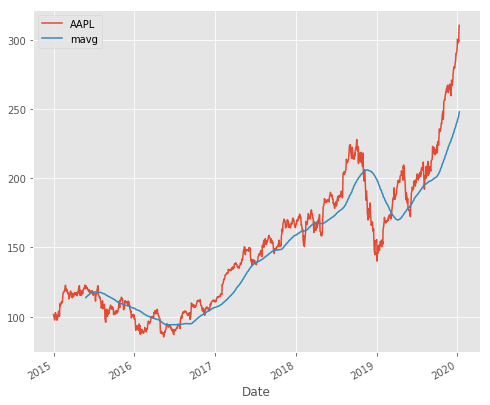

In [11]:
mpl.rc('figure',figsize = (8,7))
#adjusting the style of matplotlob
style.use('ggplot')
close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

return Deviation to determine risk and return 
Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment 

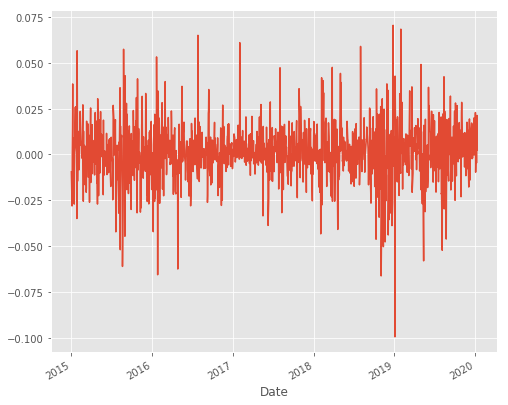

In [12]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

Analysng with Competitors Stocks

In [16]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
print(dfcomp.tail())

Symbols           AAPL     GE         GOOG         IBM        MSFT
Date                                                              
2020-01-06  299.799988  12.14  1394.209961  134.100006  159.029999
2020-01-07  298.390015  12.05  1393.339966  134.190002  157.580002
2020-01-08  303.190002  11.94  1404.319946  135.309998  160.089996
2020-01-09  309.630005  11.91  1419.829956  136.740005  162.089996
2020-01-10  310.329987  11.67  1429.729980  136.690002  161.339996


In [17]:
retscomp = dfcomp.pct_change() 
#Percentage change will find how much the price changes compared to the previous day which defines returns.
corr = retscomp.corr() 
#Knowing the correlation will help us see whether the returns are affected by other stocks’ returns

Text(0, 0.5, 'Returns GOOG')

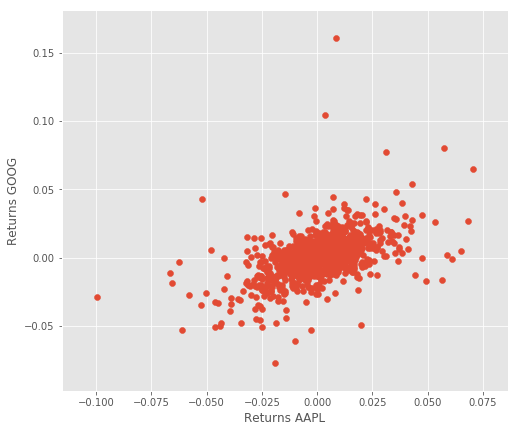

In [19]:
plt.scatter(retscomp.AAPL, retscomp.GOOG)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GOOG')

There are slight positive correlations among Google and Apple returns. It seems like that the higher the Apple return, the higher Google return as well for most cases.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


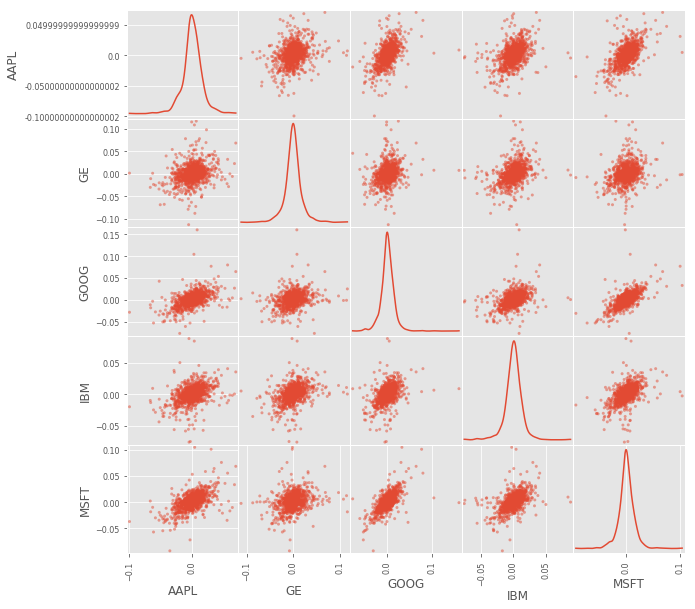

In [20]:
pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));


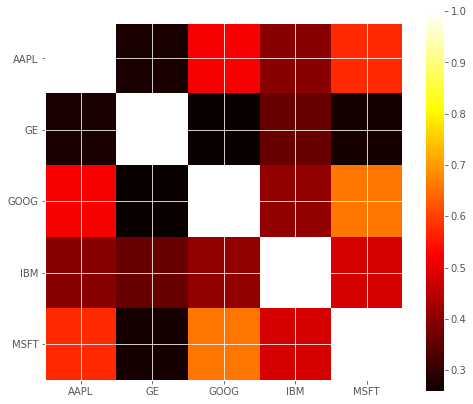

In [21]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

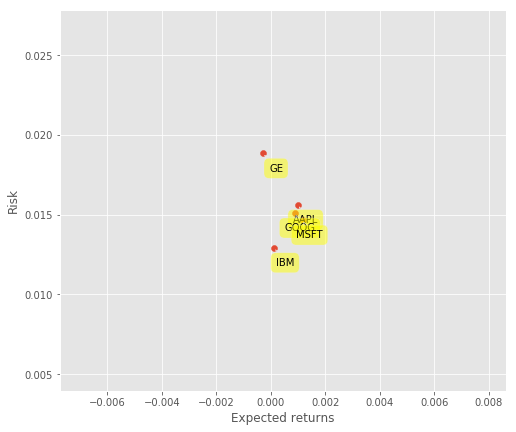

In [22]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [25]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [37]:
import math;
import numpy as np
from sklearn import preprocessing
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 


In [46]:
#split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [47]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [51]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)

0.9676941973420672
0.9672394876022898
0.9676086221806286
0.9128961652133618


In [63]:
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[181 214 438 ... 968 448 527]
continuous
multiclass
multiclass


In [66]:
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(X_test)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(X_test))
print(utils.multiclass.type_of_target(X_test.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

ValueError: bad input shape (251, 4)

In [64]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
forecast_set = clf.predict(X_lately)
dfreg['Forecast'] = np.nan


ValueError: Unknown label type: 'continuous'